In [1]:
import pandas as pd

In [15]:
df = pd.concat([pd.read_csv('./Spotify_Dataset1.csv'), pd.read_csv('./Spotify_Dataset2.csv')])
df.head()

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
0,1.0,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200.0,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,1.0,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,200.0,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
2,2.0,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199.0,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...
3,3.0,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198.0,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
4,3.0,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,198.0,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...


In [19]:
top_ten_artists = df['Artist (Ind.)'].value_counts().to_frame().reset_index()[:10]['Artist (Ind.)'].values

In [20]:
df = df[['Title','Danceability','Energy','Loudness','Speechiness','Acousticness','Instrumentalness','Valence','Artist (Ind.)']].dropna()
df['Artist (Ind.)'] = df['Artist (Ind.)'].apply(lambda name: name.replace("$$","ss"))
df = df[df['Artist (Ind.)'].isin(top_ten_artists)]
df.head()

,Title,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Artist (Ind.)
2,WHERE SHE GOES,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Bad Bunny
7,un x100to,0.569,0.724,-4076.0,0.047,0.228,0.000,0.562,Bad Bunny
21,Creepin' (with The Weeknd & 21 Savage),0.715,0.620,-6005.0,0.048,0.417,0.000,0.172,The Weeknd
23,Die For You (with Ariana Grande) - Remix,0.575,0.500,-7594.0,0.071,0.227,0.000,0.506,The Weeknd
41,Die For You,0.586,0.525,-7163.0,0.062,0.111,0.000,0.508,The Weeknd


In [21]:
import plotly.express as px
px.bar(df['Artist (Ind.)'].value_counts().to_frame().reset_index(), x='Artist (Ind.)', y='count')

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import plotly.express as px

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,~df.columns.isin(['Title','Artist (Ind.)'])].values, df['Artist (Ind.)'].values, random_state = 0)

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtree_model = DecisionTreeClassifier(max_depth = 20).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

In [26]:
cm = confusion_matrix(y_test, dtree_predictions, normalize='true')

<Axes: >

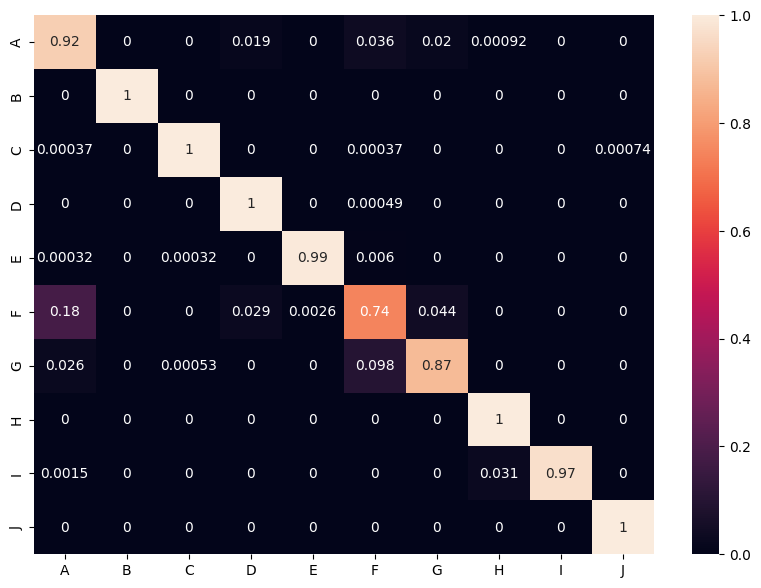

In [27]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cm, index = [i for i in "ABCDEFGHIJ"],
                  columns = [i for i in "ABCDEFGHIJ"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)